# Cross Validation And Evaluating Model Performance

In this notebook, we will learn about cross validation and how to evaluate the performance of a model. When evaluating a model, we need to be careful we are evaluating it in the right way. Especially, training and testing a model on the same dataset is a mistake. This is because the model will be able to memorize the training data and will not be able to generalize to new data. Therefore, one of the most important concepts in machine learning is cross validation. In cross validation, the dataset is divided into multiple parts. The model is trained on some parts and tested on the remaining parts. We already saw this shortly in the previous notebooks, when we used the `train_test_split` function; we used one part of the data for training and left another part of the data apart for evaluating. This is a simple form of cross validation. In this notebook, we will learn about other forms of cross validation, we will use the cross validation techniques that are part of [sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)

In this notebook, we will use the Titanic dataset again. We will start by downloading and loading the preprocessed dataset.

In [4]:
import os

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    os.environ['DATA_DIRECTORY'] = '/content'
else:
    os.environ['DATA_DIRECTORY'] = '../../data'

data_directory = os.getenv('DATA_DIRECTORY')

In [5]:
%%bash
if [ ! -f "$DATA_DIRECTORY/course-data.zip" ]; then
    wget "https://gitlab.com/api/v4/projects/52375047/jobs/artifacts/master/raw/data/course-data.zip?job=build_data_zip" -O "$DATA_DIRECTORY/course-data.zip"
    unzip "$DATA_DIRECTORY/course-data.zip" -d "$DATA_DIRECTORY"
fi

In [ ]:
import pandas as pd 

titanic_df = pd.read_csv(os.path.join(data_directory, 'titanic/train_preprocessed.csv'))
titanic_df.head()

Age      Fare  Survived  Pclass_1  Pclass_2  Pclass_3  SibSp_0  \
0 -0.565736 -0.502445         0       0.0       0.0       1.0      0.0   
1  0.663861  0.786845         1       1.0       0.0       0.0      0.0   
2 -0.258337 -0.488854         1       0.0       0.0       1.0      1.0   
3  0.433312  0.420730         1       1.0       0.0       0.0      0.0   
4  0.433312 -0.486337         0       0.0       0.0       1.0      1.0   

   SibSp_1  SibSp_2  SibSp_3  ...  Parch_4  Parch_5  Parch_6  Sex_female  \
0      1.0      0.0      0.0  ...      0.0      0.0      0.0         0.0   
1      1.0      0.0      0.0  ...      0.0      0.0      0.0         1.0   
2      0.0      0.0      0.0  ...      0.0      0.0      0.0         1.0   
3      1.0      0.0      0.0  ...      0.0      0.0      0.0         1.0   
4      0.0      0.0      0.0  ...      0.0      0.0      0.0         0.0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  Cabin_False  Cabin_True  
0       1.0         0.0         0.0         1.0          0.0         1.0  
1       0.0         1.0         0.0         0.0          1.0         0.0  
2       0.0         0.0         0.0         1.0          0.0         1.0  
3       0.0         0.0         0.0         1.0          1.0         0.0  
4       1.0         0.0         0.0         1.0          0.0         1.0  

[5 rows x 27 columns]

After loading the preprocessed data, we will still get the labels and remove these labels from the original dataset. 

In [7]:
y = titanic_df['Survived']
X = titanic_df.drop('Survived', axis=1)

## Train test split

As we just said, the train test split is a simple form of cross validation. In this form, we split the dataset into two parts: the training set and the testing set. We train the model on the training set and evaluate it on the testing set. We can use the `train_test_split` function from `sklearn` to split the dataset into training and testing sets.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

And then train a Random Forest model on the training data `X_train` and the training labels `y_train`:

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

After training we can evaluate the model on the testing data `X_test` and the testing labels `y_test`. This gives an estimate of the model's performance on unseen data.

In [10]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



However, this is not the best way to evaluate a model. Using one train test split can lead to a overly simple of overly complex training or test set. The estimate of the model's performance on unseen data may be too optimistic or too pessimistic. To overcome this, we can use more complex forms of cross validation. In these forms, the dataset is repeatedly split into training and testing sets. The model is trained on the training set and evaluated on the testing set. The performance of the model is averaged over all the splits. This gives a more reliable estimate of the model's performance on unseen data. It also gives an estimate of the variance of the model's performance.

## K-fold cross validation

There are a couple of cross validation techniques that do a repeated train test split. Several of them are implemented in the [sklearn cross validation package](https://scikit-learn.org/stable/modules/cross_validation.html), some of them are:
- KFold
- StratifiedKFold
- GroupKFold
- TimeSeriesSplit
- RepeatedKFold
- RepeatedStratifiedKFold
- LeaveOneOut
- LeavePOut
  
We will focus here on the most common one, the KFold cross validation. In KFold cross validation, the dataset is divided into `K` parts. The model is evaluated in several iterations. In each iteration, the model is trained on `K-1` parts and tested on the remaining part. This is repeated `K` times, each time using a different part for testing. The performance of the model is averaged over all the splits. This gives a more reliable estimate of the model's performance on unseen data. It also gives an estimate of the variance of the model's performance. Graphically, KFold cross validation looks like this:


![K-fold](./grid_search_cross_validation.png)

To implement KFold cross validation, we can use the `KFold` class from `sklearn`. We can create a `KFold` object with the number of splits `K` and then use the `split` method to get the indices of the training and testing sets. We can then use these indices to get the training and testing sets from the dataset. We train the model on the training set and evaluate it on the testing set. Below, we use the `accuracy_score` function from `sklearn` to evaluate the model. We saw the accuracy score of each iteration and then create a dataframe with all scores.

In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

kf_df = pd.DataFrame({'fold': range(1, len(accuracy_scores)+1), 'accuracy': accuracy_scores})
kf_df

fold  accuracy
0     1  0.798883
1     2  0.775281
2     3  0.831461
3     4  0.797753
4     5  0.842697

Above, we can see the accuracy score of each iteration. We can now calculate the mean and standard deviation of the accuracy scores.

In [12]:
kf_df['accuracy'].mean(), kf_df['accuracy'].std()

(0.8092147385600402, 0.02741145453666504)

Next to KFolds, there are also more specialized forms of KFolds in sklearn. For example, `StratifiedKFold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class. This is useful for imbalanced datasets. We can use `StratifiedKFold` in the same way as `KFold`. In addition, there is `GroupKFold` which is a variation of KFold that ensures that the same group is not represented in both the training and testing sets. This is useful for datasets with groups, such as medical data with multiple measurements from the same patient. Again, we can use `GroupKFold` in the same way as `KFold`.

## Cross validation with `cross_val_score`

In the previous example, we manually implemented KFold cross validation. However, `sklearn` provides a more convenient way to do cross validation. We can use the `cross_val_score` function from `sklearn` to do cross validation. We can pass the model, the dataset, the labels, and the number of splits to the `cross_val_score` function. The function will do the cross validation and return the scores of the model on each split. We can then calculate the mean and standard deviation of the scores. Below, we use the `cross_val_score` function to do KFold cross validation on the Titanic dataset. Again, we use the accuracy to evaluate the model. The `cross_val_score` function returns the accuracy scores of the model on each split. We can then create a dataframe again with all scores.

In [13]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

scores_df = pd.DataFrame({
    'Fold': range(1, len(scores)+1),
    'Score': scores
})

scores_df

Fold     Score
0     1  0.782123
1     2  0.792135
2     3  0.837079
3     4  0.769663
4     5  0.820225

And then calculate the mean and standard deviation of the accuracy scores, just as we did above.

In [14]:
scores_df['Score'].mean(), scores_df['Score'].std()

(0.8002448057246877, 0.027772989424181216)

You can see that using the `cross_val_score` function is much more convenient than manually implementing KFold cross validation. It saves us a lot of code and makes our code more readable. The form of cross validation the `cross_val_score` function uses is determined by its parameters.
If we pass a test set `X` and labels `y` and leave the `cv` parameter unset, the `cross_val_score` function will use 5-fold cross validation by default. We can also specify the number of splits by setting the `cv` parameter to an integer. For example, we can set `cv=10` to do 10-fold cross validation. If the labels in `y` are either binary or multiclass, `cross_val_score` will use `StratifiedKFold`. In all other cases, it will use `KFold`. However, we can also use other forms of cross validation by passing a `KFold`, `StratifiedKFold`, or `GroupKFold` object to the `cv` parameter. 

## Learning Curves

Another way to evaluate the performance of a model is by using learning curves. Learning curves show the performance of a model on the training and testing sets as a function of the number of training samples. For each sample size, a cross validation is carried out. A learning curve therefore shows an average performance and the variance of that performance for each sample size. With learning curves we can see when the model performance converges. This gives an indication of the size of the training set needed to get a good model. After model performance converges, adding more training samples will not improve the model. Using learning curves, we can determine if a model still can be improved or if the model is already optimal. It can also help to determine whether a model is overfitting or underfitting and help us find a balance between training time, annotation costs, and model performance. 

We can use the `learning_curve` function from `sklearn` to plot learning curves. We can pass the model, the dataset, the labels, and the number of splits to the `learning_curve` function. The function will do cross validation and return the training and testing scores of the model on each split. We can then plot the learning curves. Below, we use the `learning_curve` function to plot learning curves for a Random Forest model on the Titanic dataset. 

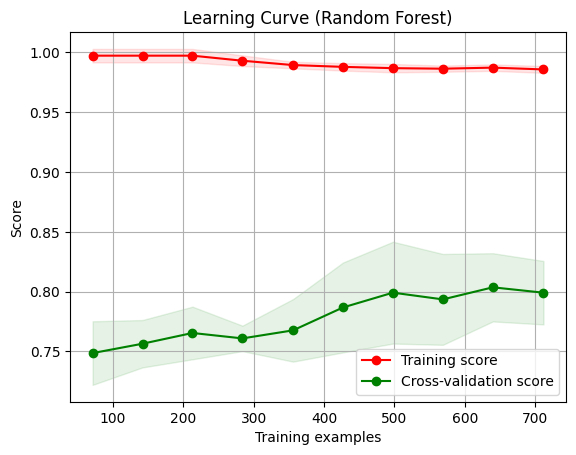

In [19]:
from sklearn.model_selection import learning_curve
import numpy as np

import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, random_state=42), 
    X, y, cv=5, scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In the plot above, we can see the training performance on the Titanic dataset in red and the cross-validation scores in green. It can be seen, that the cross-validation score is lower than the training score. Also the variance when adding more samples is increasing. This is a sign of overfitting. The model is not able to generalize to new data. Overfitting can be caused by several things:
- The model is too complex
- The model is trained on too little data
- The model is trained on data that is not representative of the test data
- The model is trained on data that is too noisy
- Feature engineering was not optimal

In this case, part of it may be caused by the model. By changing the hyperparameters of the  `RandomForestClassifier`, we can try to improve the model performance:

```python
RandomForestClassifier(n_estimators=100, 
                           max_depth=5, 
                           min_samples_split=5, 
                           min_samples_leaf=4, 
                           random_state=42), 
```

Indeed, when tuning the hyperparameters further, we see that the model performances of the training and the test set are converging toward the same value. This is a sign that the model is not overfitting anymore.

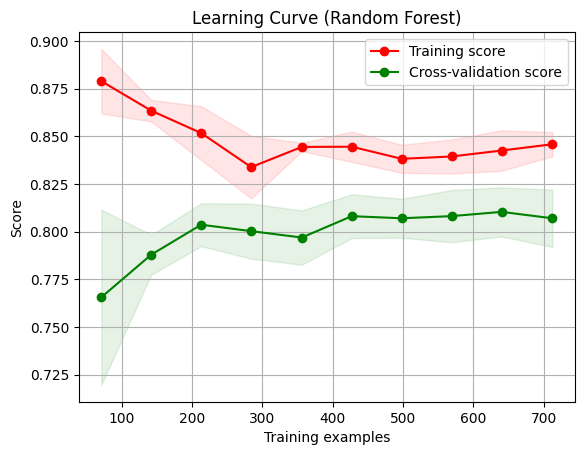

In [20]:
from sklearn.model_selection import learning_curve
import numpy as np

import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, 
                           max_depth=5, 
                           min_samples_split=5, 
                           min_samples_leaf=4, 
                           random_state=42), 
    X, y, cv=5, scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# Conclusion

In this notebook, we learned about cross validation and how to evaluate the performance of a model. We saw that using one train test split can lead to a overly simple or overly complex training or test set. The estimate of the model's performance on unseen data may be too optimistic or too pessimistic. To overcome this, we can use more complex forms of cross validation. In these forms, the dataset is repeatedly split into training and testing sets. The model is repeatedly trained on a different training set and evaluated on a different testing set. The performance of the model is averaged over all the splits. This gives a more reliable estimate of the model's performance on unseen data. It also gives an estimate of the variance of the model's performance. 

We saw that using the `cross_val_score` function is much more convenient than manually implementing KFold cross validation. It saves us a lot of code and makes our code more readable. We also learned about learning curves and how they can help us to determine if a model still can be improved or if the model is already optimal. It can also help us to determine whether a model is overfitting or underfitting and help us find a balance between training time, annotation costs, and model performance.